In [25]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import cv2
import glob

In [26]:
def datasets(PATH):
    labels = ['female','male']
    data = []
    for i in range(2):
        PATH_new = PATH + labels[i] + "\\*"
        print(PATH)
        for rasm in glob.glob(PATH_new):
            rasm = cv2.imread(rasm)
            rasm = cv2.resize(rasm,(96,96))
            data.append((rasm,i))
    return data

In [37]:
train_dir = 'C:/Users/Lucas/Desktop/ML_data/Gender/Train/'
test_dir = 'C:/Users/Lucas/Desktop/ML_data/Gender/Test/'

In [38]:
train_dataset = datasets(train_dir)
test_dataset = datasets(test_dir)

C:/Users/Lucas/Desktop/ML_data/Gender/Train/
C:/Users/Lucas/Desktop/ML_data/Gender/Train/
C:/Users/Lucas/Desktop/ML_data/Gender/Test/
C:/Users/Lucas/Desktop/ML_data/Gender/Test/


In [39]:
x_train,y_train = np.array([i[0] for i in train_dataset],dtype=np.uint8),np.array([i[1] for i in train_dataset],dtype=np.uint8)

In [40]:
print(x_train.shape)
print(y_train.shape)

(47009, 96, 96, 3)
(47009,)


In [41]:
x_test,y_test = np.array([i[0] for i in test_dataset],dtype=np.uint8),np.array([i[1] for i in test_dataset],dtype=np.uint8)

In [42]:
print(x_test.shape)
print(y_test.shape)

(11649, 96, 96, 3)
(11649,)


In [43]:
print("----TRAIN dataset----")
print("All people =",len(train_dataset))
print("Women's img =",len([i for i in train_dataset if i[1]==0]))
print("Men's img =",len([i for i in train_dataset if i[1]==1]))

----TRAIN dataset----
All people = 47009
Women's img = 23243
Men's img = 23766


In [44]:
print("----TEST dataset----")
print("All people =",len(test_dataset))
print("Women's img =",len([i for i in test_dataset if i[1]==0]))
print("Men's img =",len([i for i in test_dataset if i[1]==1]))

----TEST dataset----
All people = 11649
Women's img = 5841
Men's img = 5808


In [45]:
model = keras.Sequential([
    keras.layers.Conv2D(32,(3,3),input_shape=(96,96,3),activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Dropout(0.25),

    keras.layers.Conv2D(64,(3,3),activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Dropout(0.25),

    keras.layers.Conv2D(128,(3,3),activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Dropout(0.2),

    keras.layers.Flatten(),
    keras.layers.Dense(64,activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.5),

    keras.layers.Dense(32,activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.25),

    keras.layers.Dense(1,activation='sigmoid')
])

In [47]:
opt = keras.optimizers.Adam(learning_rate = 0.001)
model.compile(optimizer = opt,loss='binary_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,epochs=3)

Epoch 1/3
1470/1470 [==============================] - 543s 367ms/step - loss: 0.2235 - accuracy: 0.9134
Epoch 2/3
1470/1470 [==============================] - 1151s 783ms/step - loss: 0.1697 - accuracy: 0.9380
Epoch 3/3
1470/1470 [==============================] - 440s 299ms/step - loss: 0.1506 - accuracy: 0.9459


In [48]:
model.evaluate(x_test,y_test)

365/365 [==============================] - 19s 51ms/step - loss: 0.1131 - accuracy: 0.9604


[0.1130865290760994, 0.9604257941246033]

1/1 [==============================] - 0s 183ms/step
[[0.99662745]]


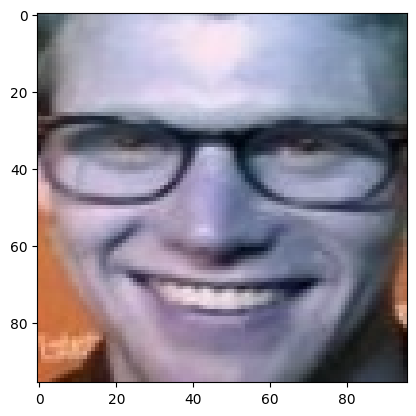

In [49]:
i = 8050
rasm = np.expand_dims(x_test[i],0)
print(model.predict(rasm))
plt.imshow(x_test[i])